In [56]:
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as file:
        next(file)
        contents = file.readlines()
        
    output = []
    for line in contents:
        m, o, r = line.strip().split()
        output.append([float(m), float(o), float(r)])
    
    return np.array(output).T

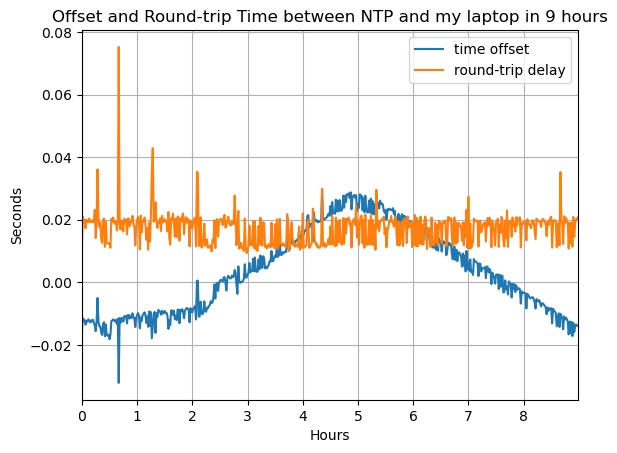

In [57]:
time, offset, rtt = read_data('data_9_hours.txt')
start = time[0]
time -= start
time /= 60
plt.plot(time, offset, label='time offset')
plt.plot(time, rtt, label='round-trip delay')
plt.title('Offset and Round-trip Time between NTP and my laptop in 9 hours')
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.xlabel('Hours')
plt.xlim([0, max(time)])
plt.ylabel('Seconds')
plt.grid(True)
plt.legend()
plt.show()

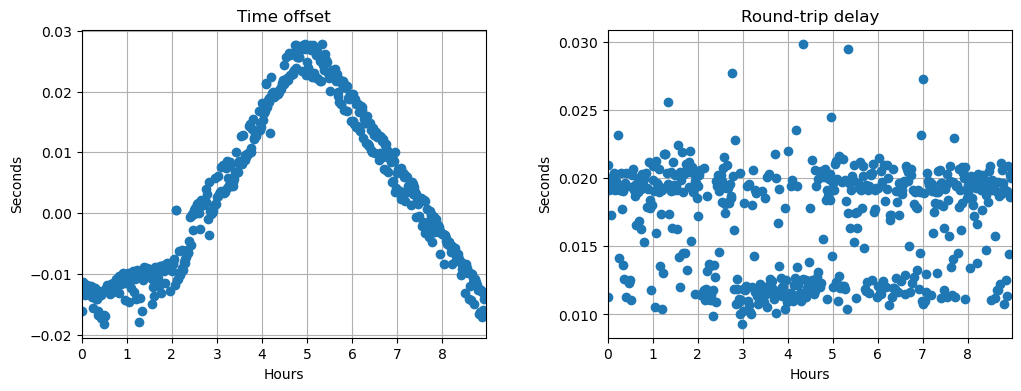

In [59]:
"""Ignore 10 outliers"""
diff = list(offset)
delay = list(rtt)
num = 8

m = diff.index(min(diff))
diff[m] = diff[m-1]

a = diff.index(max(diff[:120]))
diff[a] = diff[a-1]

for i in range(num):
    m1 = diff.index(max(diff))
    m2 = delay.index(max(delay))
    if m1 != 0:
        diff[m1] = diff[m1-1]
    if m2 != 0:
        delay[m2] = delay[m2-1]

# Ignore 10 outliers total
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(time, diff, 'o')
ax[0].set_xlabel('Hours')
ax[0].set_xlim([0, max(time)])
ax[0].set_ylabel('Seconds')
ax[0].set_title('Time offset')
ax[0].grid('on', 'both')

ax[1].plot(time, delay, 'o')
ax[1].set_xlabel('Hours')
ax[1].set_xlim([0, max(time)])
ax[1].set_ylabel('Seconds')
ax[1].set_title('Round-trip delay')
ax[1].grid('on', 'both')

plt.subplots_adjust(wspace=0.3)
plt.show()

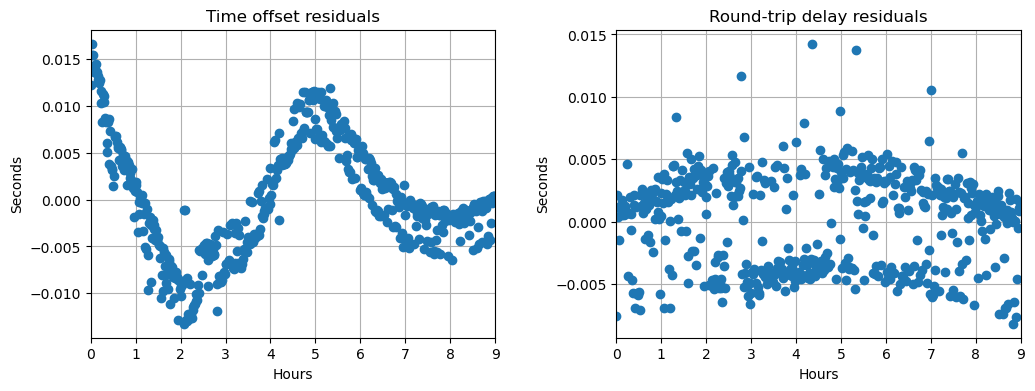

In [55]:
coeffs1 = np.polyfit(time, diff, deg=2)
model1 = np.polyval(coeffs1, time)
resid1 = diff - model1

coeffs2 = np.polyfit(time, delay, deg=2)
model2 = np.polyval(coeffs2, time)
resid2 = delay - model2

fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(time, resid1, 'o')
ax[0].set_xlabel('Hours')
ax[0].set_xlim([0, 9])
ax[0].set_ylabel('Seconds')
ax[0].set_title('Time offset residuals')
ax[0].grid('on', 'both')

ax[1].plot(time, resid2, 'o')
ax[1].set_xlabel('Hours')
ax[1].set_xlim([0, 9])
ax[1].set_ylabel('Seconds')
ax[1].set_title('Round-trip delay residuals')
ax[1].grid('on', 'both')

plt.subplots_adjust(wspace=0.3)
plt.show()

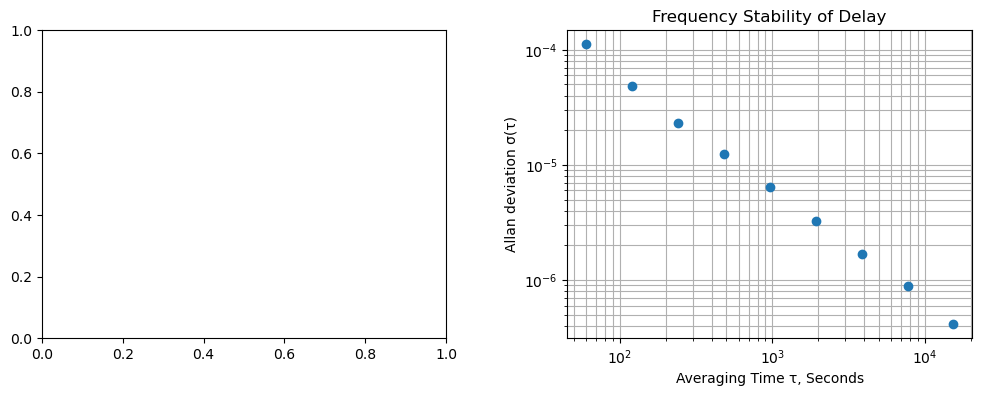

In [61]:
import allantools
resid1 = diff - model1
resid2 = delay - model2
taus1, allan_var1, _, _ = allantools.oadev(resid1, rate=1/60, data_type='phase') # 1-min intervals 
taus2, allan_var2, _, _ = allantools.oadev(resid2, rate=1/60, data_type='phase') # 1 sec = 1/60 minutes

fig, ax = plt.subplots(1,2,figsize=(12,4))

# Biased
# ax[0].loglog(taus1, allan_var1, 'o')
# ax[0].set_xlabel('Averaging Time τ, Seconds')
# ax[0].set_ylabel('Allan deviation σ(τ)')
# ax[0].set_title('Frequency Stability of Time Difference')
# ax[0].grid('on', 'both')

ax[1].loglog(taus2, allan_var2, 'o')
ax[1].set_xlabel('Averaging Time τ, Seconds')
ax[1].set_ylabel('Allan deviation σ(τ)')
ax[1].set_title('Frequency Stability of Delay')
ax[1].grid('on', 'both')

plt.subplots_adjust(wspace=0.3)
plt.show()